In [2]:
import pandas as pd
import numpy as np

from google.colab import drive 
drive.mount('/content/drive')

path = "/content/Cleandf.csv"

Cleandf=pd.read_csv(path)

Cleandf = Cleandf.drop('totChol', axis=1)
Cleandf = Cleandf.drop('cigsPerDay', axis=1)
Cleandf = Cleandf.drop('BMI', axis=1)
Cleandf = Cleandf.drop('heartRate', axis=1)
Cleandf = Cleandf.drop('BPMeds', axis=1)
Cleandf = Cleandf.drop('glucose', axis=1)
Cleandf = Cleandf.drop('newGlucose', axis=1)
Cleandf = Cleandf.drop('education', axis=1)
Cleandf = Cleandf.drop('selectedCase', axis=1)
Cleandf = Cleandf.drop('Unnamed: 0', axis=1)

Cleandf.tail()

Mounted at /content/drive


,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,totChol_1,cigsPerDay_1,BMI_1,heartRate_1,education_1,BPMeds_1,newGlucose_1
3271,1,68,1,0,0,0,109.0,73.0,0,250.0,10.0,24.68,72.0,2.0,0.0,66.0
3272,1,68,1,0,0,0,122.0,70.0,0,261.0,10.0,26.37,96.0,1.0,0.0,60.0
3273,1,68,1,0,0,0,145.0,67.0,1,193.0,15.0,23.13,75.0,1.0,0.0,72.0
3274,1,69,1,0,0,0,123.0,77.0,1,245.0,1.0,26.58,70.0,1.0,0.0,81.0
3275,1,69,1,0,1,0,151.0,74.0,0,232.0,4.0,24.14,75.0,1.0,0.0,62.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve, classification_report, accuracy_score
from sklearn.utils import shuffle

X = Cleandf.drop('TenYearCHD', axis = 1)
#X = Cleandf.drop(['TenYearCHD','totChol_1','heartRate_1','diaBP','newGlucose_1','currentSmoker','diabetes','prevalentStroke','male'], axis=1)
y = Cleandf['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((2620, 15), (656, 15))

In [15]:
X_test.tail()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,totChol_1,cigsPerDay_1,BMI_1,heartRate_1,education_1,BPMeds_1,newGlucose_1
208,0,39,0,0,0,0,125.0,80.0,229.0,0.0,24.10,75.0,1.0,0.0,58.000000
1578,0,59,1,0,0,0,122.5,67.5,240.0,3.0,25.40,88.0,2.0,0.0,81.000000
565,0,43,1,0,0,0,101.0,68.5,179.0,15.0,19.83,79.0,1.0,0.0,76.000000
313,0,40,1,0,0,0,97.0,64.5,199.0,5.0,23.41,71.0,1.0,0.0,81.228751
601,0,43,1,0,1,0,149.0,82.0,172.0,15.0,22.35,60.0,2.0,1.0,64.000000


In [14]:
X_train.tail()

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,totChol_1,cigsPerDay_1,BMI_1,heartRate_1,education_1,BPMeds_1,newGlucose_1
1095,0,50,1,0,1,0,145.5,96.0,308.0,30.0,25.61,72.0,2.0,0.0,81.228751
1130,0,51,0,0,1,0,151.5,79.0,285.0,0.0,26.91,84.0,1.0,0.0,76.000000
1294,0,54,0,0,0,0,137.5,77.5,288.0,0.0,22.19,68.0,2.0,0.0,81.228751
860,0,47,0,0,1,0,162.5,92.5,222.0,0.0,23.45,78.0,1.0,0.0,80.000000
3174,1,63,0,0,0,0,124.0,81.0,210.0,0.0,24.38,67.0,3.0,0.0,81.228751


In [5]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]   

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


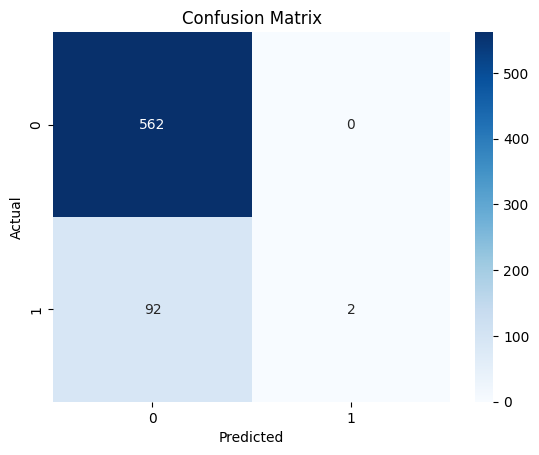

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       562
           1       1.00      0.02      0.04        94

    accuracy                           0.86       656
   macro avg       0.93      0.51      0.48       656
weighted avg       0.88      0.86      0.80       656



In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix and classification report of the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(cr)

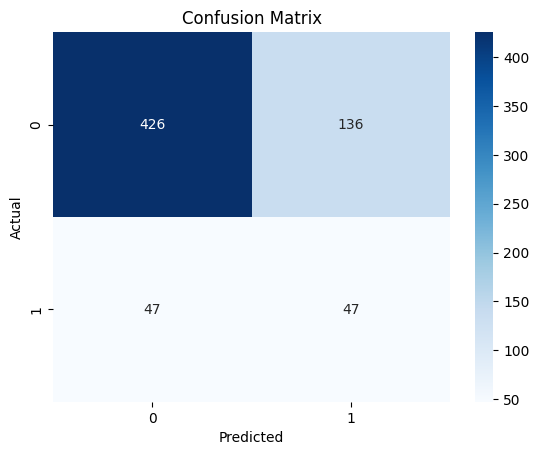

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       562
           1       0.26      0.50      0.34        94

    accuracy                           0.72       656
   macro avg       0.58      0.63      0.58       656
weighted avg       0.81      0.72      0.75       656



In [7]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.15).astype(int)

# Compute the confusion matrix and classification report of the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(cr)

In [8]:
scaled_xtest = MinMaxScaler().fit_transform(X_test)
scaled_xtestDf = pd.DataFrame(scaled_xtest,columns = X_test.columns)
scaled_xtestDf

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,totChol_1,cigsPerDay_1,BMI_1,heartRate_1,education_1,BPMeds_1,newGlucose_1
0,1.0,0.648649,1.0,0.0,0.0,0.0,0.556180,0.568627,0.699531,0.40,0.344907,0.770833,0.000000,0.0,0.673021
1,1.0,0.540541,1.0,0.0,1.0,0.0,0.646067,0.519608,0.333333,0.40,0.570023,0.458333,0.000000,0.0,0.777778
2,0.0,0.783784,0.0,0.0,1.0,0.0,0.747191,0.607843,0.253521,0.00,0.482639,0.375000,0.333333,0.0,0.361111
3,0.0,0.108108,1.0,0.0,0.0,0.0,0.398876,0.411765,0.399061,0.20,0.287037,0.395833,1.000000,0.0,0.500000
4,1.0,0.189189,1.0,0.0,1.0,0.0,0.696629,0.735294,0.403756,0.80,0.673611,0.562500,0.000000,0.0,0.673021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.0,0.189189,0.0,0.0,0.0,0.0,0.466292,0.490196,0.469484,0.00,0.427662,0.562500,0.000000,0.0,0.027778
652,0.0,0.729730,1.0,0.0,0.0,0.0,0.438202,0.245098,0.521127,0.06,0.502894,0.833333,0.333333,0.0,0.666667
653,0.0,0.297297,1.0,0.0,0.0,0.0,0.196629,0.264706,0.234742,0.30,0.180556,0.645833,0.000000,0.0,0.527778
654,0.0,0.216216,1.0,0.0,0.0,0.0,0.151685,0.186275,0.328638,0.10,0.387731,0.479167,0.000000,0.0,0.673021


In [9]:
scaled_xtrain = MinMaxScaler().fit_transform(X_train)
scaled_xtrainDf = pd.DataFrame(scaled_xtrain,columns = X_test.columns)
scaled_xtrainDf

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,totChol_1,cigsPerDay_1,BMI_1,heartRate_1,education_1,BPMeds_1,newGlucose_1
0,0.0,0.162162,1.0,0.0,0.0,0.0,0.274286,0.116505,0.311927,0.16,0.380979,0.313725,0.666667,0.0,0.750000
1,0.0,0.351351,1.0,0.0,1.0,0.0,0.885714,0.728155,0.954128,0.02,0.536860,0.372549,0.666667,0.0,0.277778
2,1.0,0.459459,1.0,0.0,0.0,0.0,0.194286,0.271845,0.513761,0.70,0.303320,0.431373,1.000000,0.0,0.444444
3,1.0,0.378378,0.0,0.0,0.0,0.0,0.708571,0.815534,0.674312,0.00,0.472707,0.823529,0.000000,0.0,0.583333
4,1.0,0.432432,1.0,0.0,0.0,0.0,0.182857,0.116505,0.444954,0.40,0.413618,0.529412,0.000000,0.0,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,0.0,0.459459,1.0,0.0,1.0,0.0,0.691429,0.796117,0.844037,0.60,0.507597,0.470588,0.333333,0.0,0.673021
2616,0.0,0.486486,0.0,0.0,1.0,0.0,0.760000,0.466019,0.738532,0.00,0.580754,0.705882,0.000000,0.0,0.527778
2617,0.0,0.567568,0.0,0.0,0.0,0.0,0.600000,0.436893,0.752294,0.00,0.315138,0.392157,0.333333,0.0,0.673021
2618,0.0,0.378378,0.0,0.0,1.0,0.0,0.885714,0.728155,0.449541,0.00,0.386044,0.588235,0.000000,0.0,0.638889


In [10]:
logreg = LogisticRegression()
logreg.fit(scaled_xtrainDf,y_train)

y_Spred = logreg.predict(scaled_xtestDf)
y_Sprob = logreg.predict_proba(scaled_xtestDf)[:, 1]   

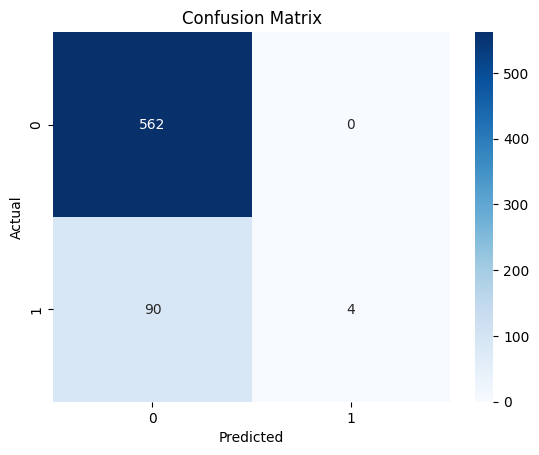

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       562
           1       1.00      0.04      0.08        94

    accuracy                           0.86       656
   macro avg       0.93      0.52      0.50       656
weighted avg       0.88      0.86      0.80       656



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix and classification report of the model
cm = confusion_matrix(y_test, y_Spred)
cr = classification_report(y_test, y_Spred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(cr)

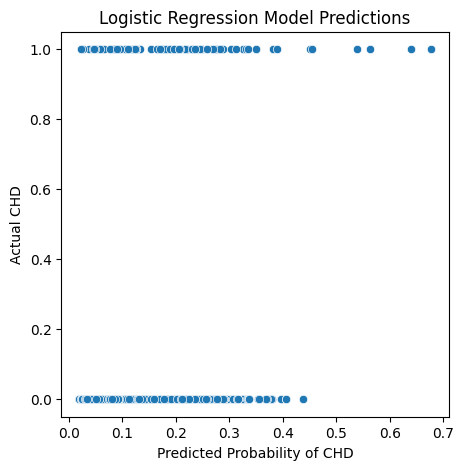

In [12]:
# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_Sprob, y=y_test)
plt.xlabel('Predicted Probability of CHD')
plt.ylabel('Actual CHD')
plt.title('Logistic Regression Model Predictions')
plt.show()

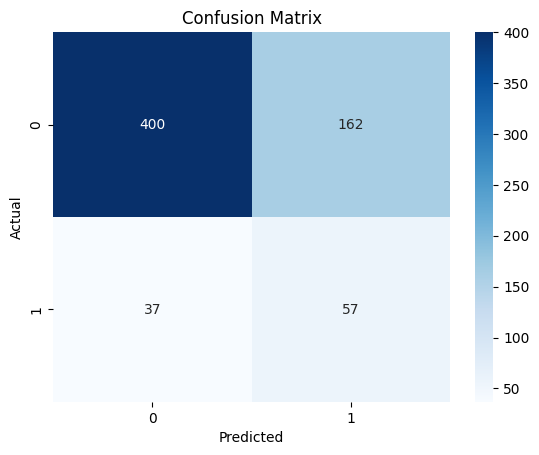

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       562
           1       0.26      0.61      0.36        94

    accuracy                           0.70       656
   macro avg       0.59      0.66      0.58       656
weighted avg       0.82      0.70      0.74       656



In [13]:
y_pred_proba = logreg.predict_proba(scaled_xtestDf)[:, 1]
y_pred = (y_pred_proba > 0.15).astype(int)

# Compute the confusion matrix and classification report of the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(cr)

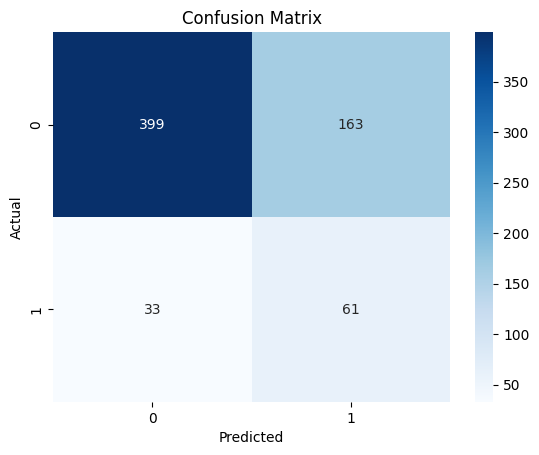

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       562
           1       0.27      0.65      0.38        94

    accuracy                           0.70       656
   macro avg       0.60      0.68      0.59       656
weighted avg       0.83      0.70      0.74       656



In [23]:
xtrainFS = scaled_xtrainDf.drop(['totChol_1','heartRate_1','diaBP','newGlucose_1','currentSmoker','diabetes','prevalentStroke','male'], axis=1)
xtestFS = scaled_xtestDf.drop(['totChol_1','heartRate_1','diaBP','newGlucose_1','currentSmoker','diabetes','prevalentStroke','male'], axis=1)

logreg.fit(xtrainFS,y_train)
y_pred_proba = logreg.predict_proba(xtestFS)[:, 1]
y_pred = (y_pred_proba > 0.15).astype(int)

# Compute the confusion matrix and classification report of the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(cr)